In [1]:
import pandas as pd
import numpy as np

In [50]:
context_config = {
    'Real': {
        'set': set(),
        'def_eps': 0.1,
    },
    'Sintetic': {
        'set': set(),
        'def_eps': 0.01,
    },
}

df = pd.read_csv('out_refactored.csv')
for i, cont in enumerate(df['Context']):
    cont_splited = cont.split('/')
    new_name = cont_splited[-1].split('.')[0]
    if len(cont_splited) > 2:
        context_config['Sintetic']['set'].add(new_name)
    else:
        context_config['Real']['set'].add(new_name)
    df.at[i, 'Context'] = (new_name)

df.head()

,Context,Epsilon,Delta,Aproximation_type,Distribution_type,Threads,Total_execution_time,Total_time,Total_exec_time_2,Total_closure_time,...,Basis_size,Total_counter_examples,Sum_total_tries,Equal_to_count,Empty_set_closure_computes,Support_avg,Support_p10,Support_p50,Support_p90,Support_p95
0,mushroom,0.1,0.1,weak,uniform,8,0.111396,0.016469,0.044174,0.000000,...,10,59,1196,98,1,24.985229,89.709503,7.090103,0.000000,0.000000
1,mushroom,0.1,0.1,weak,frequent,8,0.802246,0.062004,0.688678,0.000000,...,69,208,3977,852,1,26.157601,56.720827,23.042836,2.264894,0.590842
2,mushroom,0.1,0.1,weak,area-based,8,0.912432,0.067337,0.794175,0.000000,...,76,224,4582,974,1,24.630076,54.948301,20.088626,1.329394,0.295421
3,mushroom,0.1,0.1,strong,uniform,8,0.680548,0.016272,0.614398,0.002727,...,95,116,458,1411,1,11.694006,29.197440,5.317578,0.295421,0.098474
4,mushroom,0.1,0.1,strong,frequent,8,49.446444,0.840661,48.545906,0.418339,...,614,1944,35494,41091,1,11.825640,25.997046,7.680945,1.181684,0.590842


In [51]:
default_epxerement = df[
    ((df['Epsilon'] == context_config['Real']['def_eps']) &
        (df['Context'].isin(context_config['Real']['set']))) |
    ((df['Epsilon'] == context_config['Sintetic']['def_eps']) &
        (df['Context'].isin(context_config['Sintetic']['set'])))
]
default_groupby = default_epxerement.groupby(
    ['Aproximation_type', 'Distribution_type', 'Context']
).mean()

In [53]:
default_groupby[['Total_execution_time']].to_csv('Table_2_time_execution.csv')

In [54]:
default_groupby[['Basis_size']].to_csv('Table_3_basis_size.csv')

In [55]:
default_groupby[[
    'Support_avg', 'Support_p10', 'Support_p50', 'Support_p90', 'Support_p95'
]].to_csv('Table_5_support.csv')

In [56]:
a = df.groupby(['Epsilon', 'Context', 'Distribution_type', 'Aproximation_type']).count()

In [57]:
default_gby = default_epxerement.groupby(
    ['Aproximation_type', 'Distribution_type', 'Context'], as_index=False
).mean()

In [58]:
default_gby.head()

,Aproximation_type,Distribution_type,Context,Epsilon,Delta,Threads,Total_execution_time,Total_time,Total_exec_time_2,Total_closure_time,...,Basis_size,Total_counter_examples,Sum_total_tries,Equal_to_count,Empty_set_closure_computes,Support_avg,Support_p10,Support_p50,Support_p90,Support_p95
0,strong,area-based,10,0.01,0.1,8.0,0.376589,0.200175,0.170924,0.022646,...,323.666667,627.555556,112161.000,4.644444e+01,4.666667e+00,32.506268,33.333333,33.333333,30.000000,14.814815
1,strong,area-based,15,0.01,0.1,8.0,0.536955,0.286924,0.244361,0.018683,...,294.750000,548.500000,138343.625,9.225000e+01,0.000000e+00,28.147980,31.666666,29.166667,23.611111,19.444444
2,strong,area-based,5,0.01,0.1,8.0,0.042607,0.000000,0.000000,0.000000,...,0.000000,0.000000,299.000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
3,strong,area-based,6,0.01,0.1,8.0,0.669985,0.000000,0.000000,0.000000,...,0.000000,0.000000,299.000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
4,strong,area-based,chess,0.10,0.1,8.0,2661.100084,39.784833,2621.168990,35.608351,...,6185.500000,46388.000000,417784.750,5.376959e+06,1.742360e+06,6.488784,15.417710,3.770338,0.844806,0.484982


In [59]:
def get_from_ds(df, distribution, approximation, column):
    res = df[(df['Aproximation_type'] == approximation) & (df['Distribution_type'] == distribution)][column]
    if len(res):
        return res.iloc[0]
    else:
        return -1.0

def get_from_ds_columns(df, distribution, approximation, columns):
    res = ''
    for column in columns:
        res += '%.4f' % get_from_ds(df, distribution, approximation, column) + ' & '
    return res

context_map = {
    'Census': '',
    'nom10shuttle': '',
    'Mushroom': '',
    'Connect': '',
    'inter10shuttle': '',
    'Chess': '',
    'Example 1 (n = 5)': '',
    'Example 1 (n = 6)': '',
    'Example 2 (n = 10)': '',
    'Example 2 (n = 15)': '',
}

for context in context_map:
    if context[0] == 'E':
        context_map[context] = context.split()[-1][:-1]
    else:
        context_map[context] = context.lower()

distributions = [
    'uniform',
    'frequent',
    'area-based',
    'squared-frequency',
]

approximations = ['strong', 'weak']

res = str()
for context, context_from_config in context_map.items():
    eps_value = context_config['Real']['def_eps']\
        if context_from_config in context_config['Real']['set']\
            else context_config['Sintetic']['def_eps']

    context_rows = default_gby[
        (default_gby['Context'] == context_from_config) &
        (abs(default_gby['Epsilon'] - eps_value) < 0.0003)
    ]
    res += '        ' + context + ' & '
    for approximation in approximations:
        for distribution in distributions:
            res += '%.2f' % get_from_ds(context_rows, distribution, approximation, 'Basis_size') + ' & '
    res = res[:-2] + '\\\\\n'
print(res)

        Census & 48.00 & -1.00 & -1.00 & -1.00 & 41.00 & 846.67 & 3106.50 & -1.00 \\
        nom10shuttle & 76.00 & 196.33 & 195.67 & -1.00 & 76.00 & 143.50 & 149.67 & -1.00 \\
        Mushroom & 95.00 & 606.00 & 547.71 & -1.00 & 7.62 & 72.38 & 71.12 & -1.00 \\
        Connect & 120.00 & 10574.00 & 10403.00 & -1.00 & 7.00 & 10.14 & 9.14 & -1.00 \\
        inter10shuttle & 172.00 & 437.33 & 437.83 & -1.00 & 171.00 & 171.00 & 171.00 & -1.00 \\
        Chess & 64.00 & 6269.00 & 6185.50 & -1.00 & 48.00 & 48.33 & 48.17 & -1.00 \\
        Example 1 (n = 5) & 5.00 & 0.00 & 0.00 & 0.00 & 5.00 & 0.00 & 0.00 & 0.00 \\
        Example 1 (n = 6) & 6.00 & 0.00 & 0.00 & -1.00 & 6.00 & 0.00 & 0.00 & -1.00 \\
        Example 2 (n = 10) & 359.22 & 295.78 & 323.67 & -1.00 & 321.89 & 225.56 & 292.67 & -1.00 \\
        Example 2 (n = 15) & 439.56 & 9.75 & 294.75 & -1.00 & 382.22 & 9.25 & 77.12 & -1.00 \\



In [60]:
df.head()

,Context,Epsilon,Delta,Aproximation_type,Distribution_type,Threads,Total_execution_time,Total_time,Total_exec_time_2,Total_closure_time,...,Basis_size,Total_counter_examples,Sum_total_tries,Equal_to_count,Empty_set_closure_computes,Support_avg,Support_p10,Support_p50,Support_p90,Support_p95
0,mushroom,0.1,0.1,weak,uniform,8,0.111396,0.016469,0.044174,0.000000,...,10,59,1196,98,1,24.985229,89.709503,7.090103,0.000000,0.000000
1,mushroom,0.1,0.1,weak,frequent,8,0.802246,0.062004,0.688678,0.000000,...,69,208,3977,852,1,26.157601,56.720827,23.042836,2.264894,0.590842
2,mushroom,0.1,0.1,weak,area-based,8,0.912432,0.067337,0.794175,0.000000,...,76,224,4582,974,1,24.630076,54.948301,20.088626,1.329394,0.295421
3,mushroom,0.1,0.1,strong,uniform,8,0.680548,0.016272,0.614398,0.002727,...,95,116,458,1411,1,11.694006,29.197440,5.317578,0.295421,0.098474
4,mushroom,0.1,0.1,strong,frequent,8,49.446444,0.840661,48.545906,0.418339,...,614,1944,35494,41091,1,11.825640,25.997046,7.680945,1.181684,0.590842


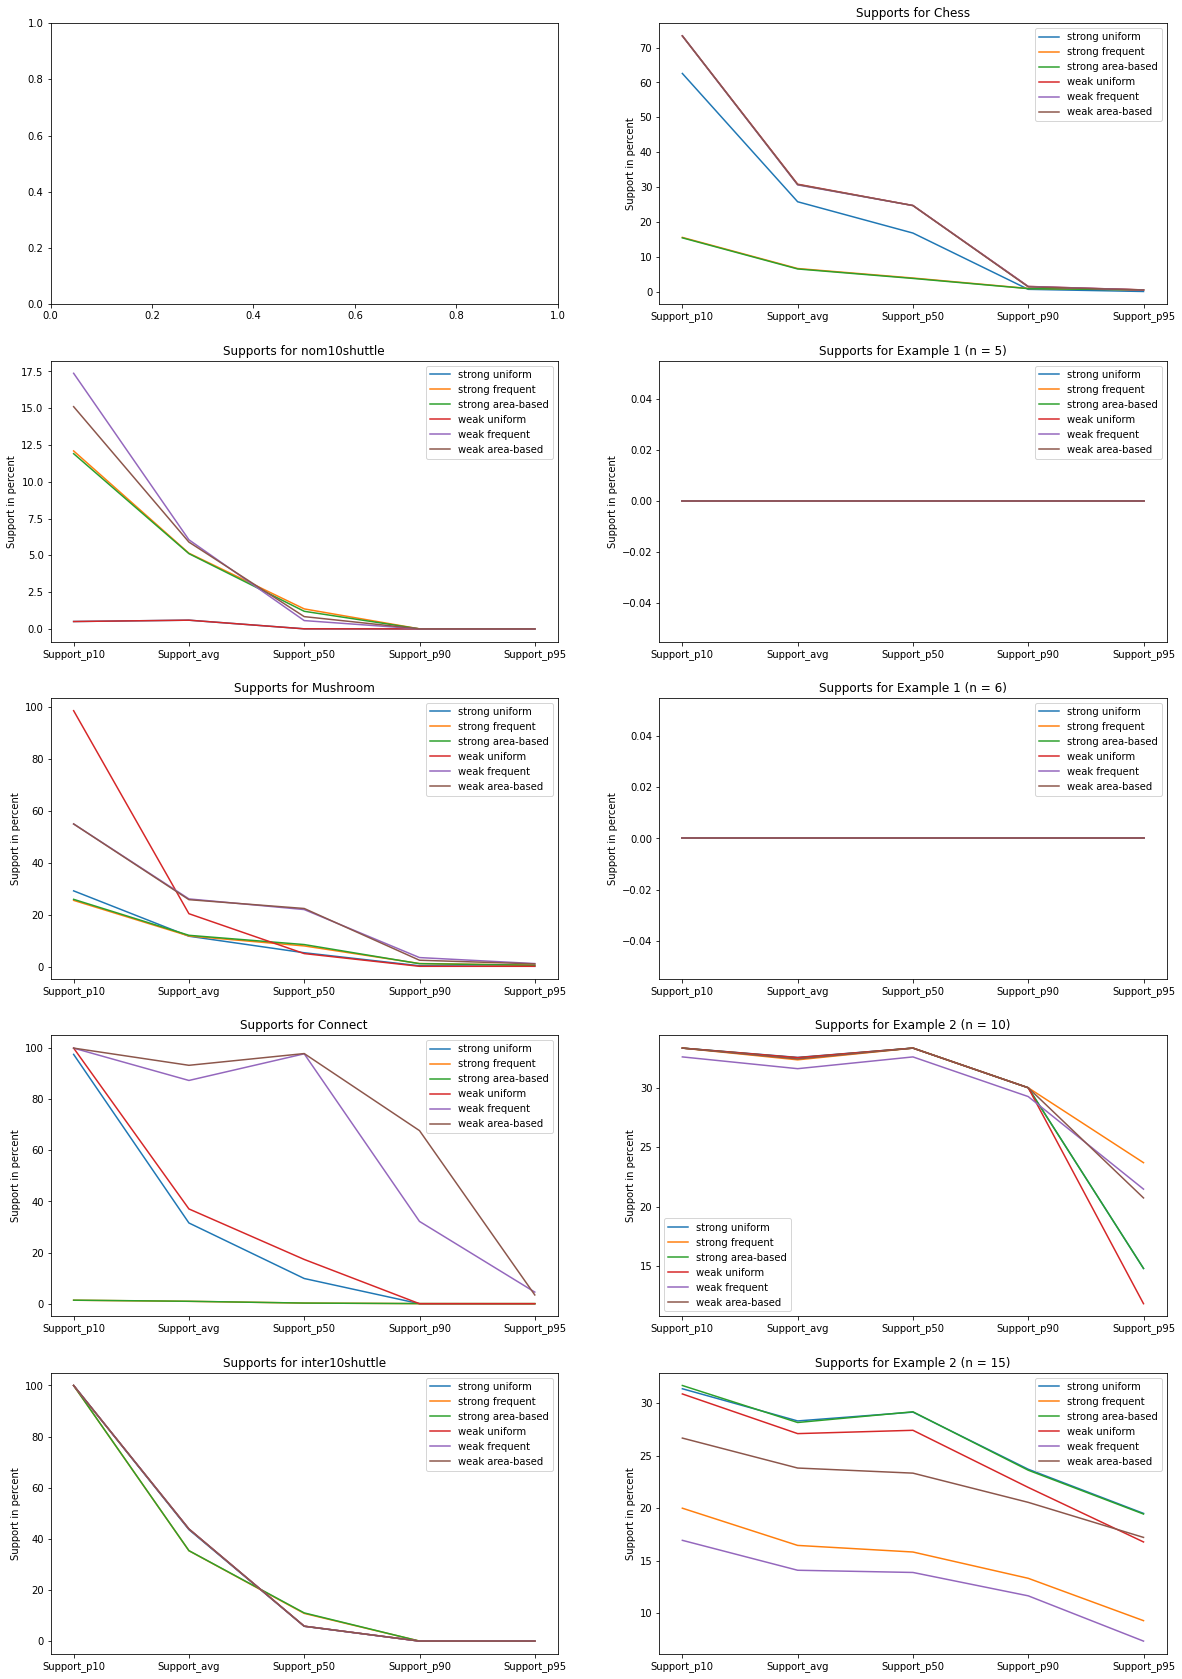

In [92]:
import matplotlib.pyplot as plt

def draw_for_context(context, ax=None):
    if ax is not None:
        plt.sca(ax)

    context_from_config = context_map[context]
    xs = ['Support_p10', 'Support_avg', 'Support_p50', 'Support_p90', 'Support_p95']
    eps_value = context_config['Real']['def_eps']\
        if context_from_config in context_config['Real']['set']\
            else context_config['Sintetic']['def_eps']
    context_rows = default_gby[
        (default_gby['Context'] == context_from_config) &
        (abs(default_gby['Epsilon'] - eps_value) < 0.0003)
    ]

    for approximation in approximations:
        for distribution in distributions:
            # TODO: Remove
            if distribution == 'squared-frequency':
                continue

            ys = []
            for x in xs:
                ys += [get_from_ds(context_rows, distribution, approximation, x)]
            plt.plot(xs, ys, label=f'{approximation} {distribution}')
    plt.title(f'Supports for {context}')
    plt.ylabel('Support in percent')
    plt.legend()

col_size = 5
row_size = 2
_, axs = plt.subplots(col_size, row_size, figsize=(20, 30))
for i, context in enumerate(context_map):
    if context == 'Census':
        continue

    draw_for_context(context, axs[i % col_size][i // col_size])

plt.show()

In [63]:
context_from_config

'15'

In [62]:
default_gby.head()

,Aproximation_type,Distribution_type,Context,Epsilon,Delta,Threads,Total_execution_time,Total_time,Total_exec_time_2,Total_closure_time,...,Basis_size,Total_counter_examples,Sum_total_tries,Equal_to_count,Empty_set_closure_computes,Support_avg,Support_p10,Support_p50,Support_p90,Support_p95
0,strong,area-based,10,0.01,0.1,8.0,0.376589,0.200175,0.170924,0.022646,...,323.666667,627.555556,112161.000,4.644444e+01,4.666667e+00,32.506268,33.333333,33.333333,30.000000,14.814815
1,strong,area-based,15,0.01,0.1,8.0,0.536955,0.286924,0.244361,0.018683,...,294.750000,548.500000,138343.625,9.225000e+01,0.000000e+00,28.147980,31.666666,29.166667,23.611111,19.444444
2,strong,area-based,5,0.01,0.1,8.0,0.042607,0.000000,0.000000,0.000000,...,0.000000,0.000000,299.000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
3,strong,area-based,6,0.01,0.1,8.0,0.669985,0.000000,0.000000,0.000000,...,0.000000,0.000000,299.000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
4,strong,area-based,chess,0.10,0.1,8.0,2661.100084,39.784833,2621.168990,35.608351,...,6185.500000,46388.000000,417784.750,5.376959e+06,1.742360e+06,6.488784,15.417710,3.770338,0.844806,0.484982
